# **Investigate Hotel Business** 

Author : Ilham Muhammad Shuhada 

---
<br>

**Table of Content:**
- Introduction
- Load Dataset
- Data Preprocessing 
<br>
<br>

## Introduction

It is very important for a company to always analyze its business performance. On this occasion, we will delve deeper into business in the hospitality sector. Our focus is to find out how our customers behave in making hotel reservations, and its relationship to the rate of cancellation of hotel reservations. We will present the results of the insights we find in the form of data visualization to make it easier to understand and more persuasive.

## Load Dataset
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.shape

(119390, 29)

In [4]:
# Overview data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Data Preparation
---

1. Cek Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

2. Cek Duplikat

In [6]:
df.duplicated().sum()

33261

**Key Takeways** :
- Terapat 119.390 data
- Tipe data object, int64, dan float64
- Terdapat 33.261 data duplikat

3. Cek Kesesuaian Data

In [7]:
# Cek data type
for col in df.columns:
    print("{} have {} unique values, type:{}".format(col, df[col].nunique(),df[col].dtypes))
    print("unique values : \n{}".format(df[col].value_counts()))
    print('-' * 100)

hotel have 2 unique values, type:object
unique values : 
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values, type:int64
unique values : 
0    75166
1    44224
Name: is_canceled, dtype: int64
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values, type:int64
unique values : 
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64
----------------------------------------------------------------------------------------------------
arrival_date_year have 3 unique values, type:int64
unique values : 
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64
---------------------------------------------------------------------

Key Takeways:
- Terdapat **Undefined** values pada fitur `meal`,`market_segment`,dan `distribution_channel`
- Tipe data float pada fitur `children`,`agent`, `company` seharusnya int

4. Cek Null Values

In [8]:
# Null value
print(((df.isnull().sum()/len(df))*100).round(2).sort_values(ascending=False))

company                           94.31
agent                             13.69
city                               0.41
hotel                              0.00
distribution_channel               0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
market_segment                     0.00
is_canceled                        0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_weekdays_nights           0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00


Key Takeways:
- Terdapat **Null** values pada fitur `company`,`agent`, `children` dan `city`
- perlu penanganan null values pada fitur tersebut

In [9]:
df.describe().round(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.0,119390.00,119390.00,119390.00,119390.00,119390.00,103050.00,6797.00,119390.00,119390.00,119390.00,119390.00
mean,0.37,104.01,2018.16,27.17,15.80,0.93,2.50,1.86,0.1,0.01,0.03,0.09,0.14,0.22,86.69,189.27,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.4,0.10,0.18,0.84,1.50,0.65,110.77,131.66,17.59,50.54,0.25,0.79
min,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,2018.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,2018.00,28.00,16.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,14.00,179.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,2019.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,229.00,270.00,0.00,126.00,0.00,1.00
max,1.00,737.00,2019.00,53.00,31.00,19.00,50.00,55.00,10.0,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00


Key Takeways :
- Terdapat data negatif pada kolom adr, perlu di handling

In [10]:
# Cek jumlah pelanggan setiap hari 
df_guest = df['adults'] + df['children'] + df['babies']
df['total_guest'] = df_guest
print("jumlah pelanggan 0 ada {}".format(df[df['total_guest'] == 0].shape[0]))

jumlah pelanggan 0 ada 180


Key takeways:
- Terdapat 180 kamar yang tidak ditempati tamu
- data ini akan di drop

5. Cek Outlier Data

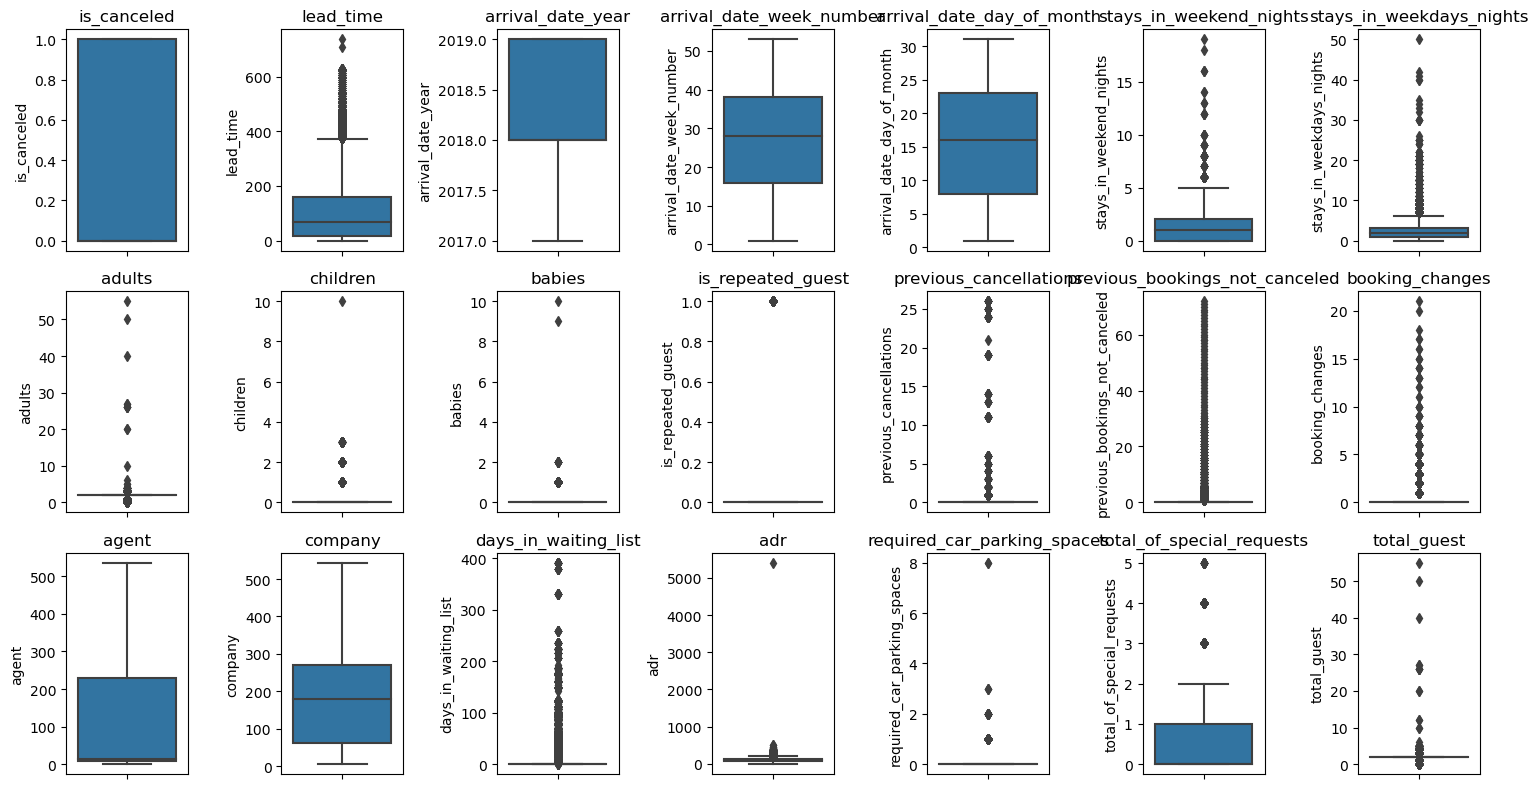

In [11]:
# cek outlier using boxplot
nums = df.select_dtypes(include=['int64', 'float']).columns.tolist()

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 7  # Adjust this based on the number of columns in your 'nums' list

plt.figure(figsize=(15, 8))
for i in range(0, len(nums)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.title(nums[i])  
    plt.tight_layout()

plt.show()

Key Takeways:
- Terdapat outlier pada `adr`, `required_parking_car`, `babies`, dan `children` 

## Data Cleaning
---

In [12]:
df_clean = df.copy()

In [13]:
df_clean.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,2.0


#### **Handling Data Null** 

Treatment :
- `company` - null value **diisi dengan 0**, mengindikasikan tamu tidak bersal dari company
- `agent` - null value **diisi dengan 0**, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen
- `city` - null values diisi dengan **'Undefined'**, karena kota tidak diketahui secara pasti.
- `children` - null values **diisi dengan 0**, mengindikasikan tamu tidak membawa anak.

In [14]:
df_clean['company'].fillna(0, inplace=True)
df_clean['agent'].fillna(0, inplace=True)
df_clean['city'].fillna('Undefined', inplace=True)
df_clean['children'].fillna(0, inplace=True)

In [15]:
df_clean['total_guest'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

In [16]:
df_clean.isna().sum().sum()

0

#### **Handling Data Tidak Sesuai** 
Fitur `meal` karena terdapat undefined, maka akan dikategorikan menjadi meal dan non meal

In [17]:
df_clean['meal'].replace(['Breakfast','Dinner','Full Board'], 'With Meal', inplace=True)
df_clean['meal'].replace(['No Meal','Undefined'], 'No Meal', inplace=True)

mengganti fitur float pada `children`,`agent`, `company` menjadi int

In [18]:
df_clean['children'] = df_clean['children'].astype(int)
df_clean['agent'] = df_clean['agent'].astype(int)
df_clean['company'] = df_clean['company'].astype(int)

#### **Handling Data Outlier Ekstriem pada `adr`, `required_parking_car`, `babies`, dan `children`**

In [19]:
# extrem adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index=index_adr.index, inplace=True)
# --------------------------------------------------------------------------------
# required_car_parking_spaces
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

# --------------------------------------------------------------------------------
# babies
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# --------------------------------------------------------------------------------
# children
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# --------------------------------------------------------------------------------
# tidak ada tamu
index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

#### **Handling Data Duplikat** 

tidak dilakukan handling data duplikat karena pada data tidak terdapat primary key atau unique id sehingga satu data tidak pasti merepresentasikan satu transaksi, maka tidak akan dilakukan handling duplicate 

In [20]:
print('jumlah baris sebelum filter outlier adalah :', len(df))
print('jumlah baris setelah filter outlier adalah :', len(df_clean))

jumlah baris sebelum filter outlier adalah : 119390
jumlah baris setelah filter outlier adalah : 119203


## Data Visualization
---

#### Monthly Hotel Booking Based on Hotel Type
---

In [21]:
df_analyze = df_clean.copy()

In [22]:
df_hotel = df_analyze.groupby('hotel')[['hotel']].count()
df_hotel.columns = ['Total Booking']
df_hotel.reset_index(inplace=True)

In [23]:
df_hotel

,hotel,Total Booking
0,City Hotel,79160
1,Resort Hotel,40043


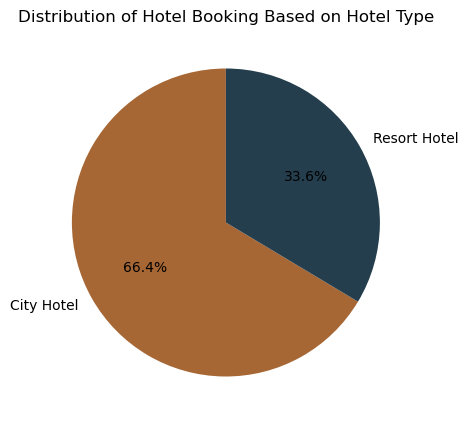

In [24]:
# Make Visualization with Pie Chart 

import matplotlib.pyplot as plt

labels = ['City Hotel', 'Resort Hotel']
sizes = [79160, 40043]

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#A66735', '#243E4D'])
plt.title('Distribution of Hotel Booking Based on Hotel Type')

# Display the pie chart
plt.show()

Key takeaways:
- **City Hotel 66.41% lebih banyak dipesan oleh pelanggan**.
- Diduga bahwa mayoritas pelanggan yang memesan Hotel City ini merupakan **pelancong yang memiliki aktivitas utama disekitar tempat mereka menginap**, bukan tujuan utama mereka untuk melakukan aktivitas di hotel.
- City hotel biasanya terletak di pusat kota atau daerah perkotaan, dekat dengan tempat-tempat wisata dan bisnis. Mereka biasanya dirancang untuk memberikan kenyamanan dan kemudahan akses ke fasilitas dan aktivitas di kota, seperti restoran, pusat perbelanjaan, dan tempat wisata.
- Sementara 33.59% lainnya merupakan pelanggan Resort Hotel. Palanggan yang memesan hotel ini diduga memang memiliki tujuan untuk berlibur dan bersantai di tempat ini karena Resort hotel biasanya terletak di tempat-tempat yang indah seperti tepi pantai, pegunungan, atau daerah pedesaan yang tenang dan terdapat fasilitas yang lengkap. <br>
<br>

#### Booking Trend Time Series Based on Hotel Type
---

In [25]:
# Jumlah Pemesanan Hotel Setiap Bulannya

df_monthly = df_analyze.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['count','nunique']).reset_index()
df_monthly

,hotel,arrival_date_month,count,nunique
0,City Hotel,April,4950,2
1,City Hotel,August,7885,2
2,City Hotel,December,7593,2
3,City Hotel,February,4114,2
4,City Hotel,January,4336,2
5,City Hotel,July,8221,2
6,City Hotel,June,7469,2
7,City Hotel,March,3729,2
8,City Hotel,May,6433,2
9,City Hotel,November,7392,2


Key Takeways :
- Dapat dilihat bahwa pada bulan october dan september jumlah pemesanan berasal dari 3 tahun dari 2017,2018, dan 2019 sementara bulan lainnya hanya dari 2 tahun sehingga perlu dilakukan normalisasi

In [26]:
# Rata-rata jumlah pesanan hotel setiap bulan
df_monthly['avg_month'] = round(df_monthly['count'] / df_monthly['nunique'], 2)
df_monthly

,hotel,arrival_date_month,count,nunique,avg_month
0,City Hotel,April,4950,2,2475.00
1,City Hotel,August,7885,2,3942.50
2,City Hotel,December,7593,2,3796.50
3,City Hotel,February,4114,2,2057.00
4,City Hotel,January,4336,2,2168.00
5,City Hotel,July,8221,2,4110.50
6,City Hotel,June,7469,2,3734.50
7,City Hotel,March,3729,2,1864.50
8,City Hotel,May,6433,2,3216.50
9,City Hotel,November,7392,2,3696.00


In [27]:
# Mengurutkan Data Berdasarkan Bulan
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

df_monthly['num_month'] = df_monthly['arrival_date_month'].map(month_dict)
df_monthly_sort = df_monthly.sort_values(by='num_month', ascending=True)
df_monthly_sort

,hotel,arrival_date_month,count,nunique,avg_month,num_month
4,City Hotel,January,4336,2,2168.00,1
16,Resort Hotel,January,2435,2,1217.50,1
3,City Hotel,February,4114,2,2057.00,2
15,Resort Hotel,February,2645,2,1322.50,2
7,City Hotel,March,3729,2,1864.50,3
19,Resort Hotel,March,2191,2,1095.50,3
0,City Hotel,April,4950,2,2475.00,4
12,Resort Hotel,April,3102,2,1551.00,4
20,Resort Hotel,May,3331,2,1665.50,5
8,City Hotel,May,6433,2,3216.50,5


Text(10, 4800, 'Holiday Season II')

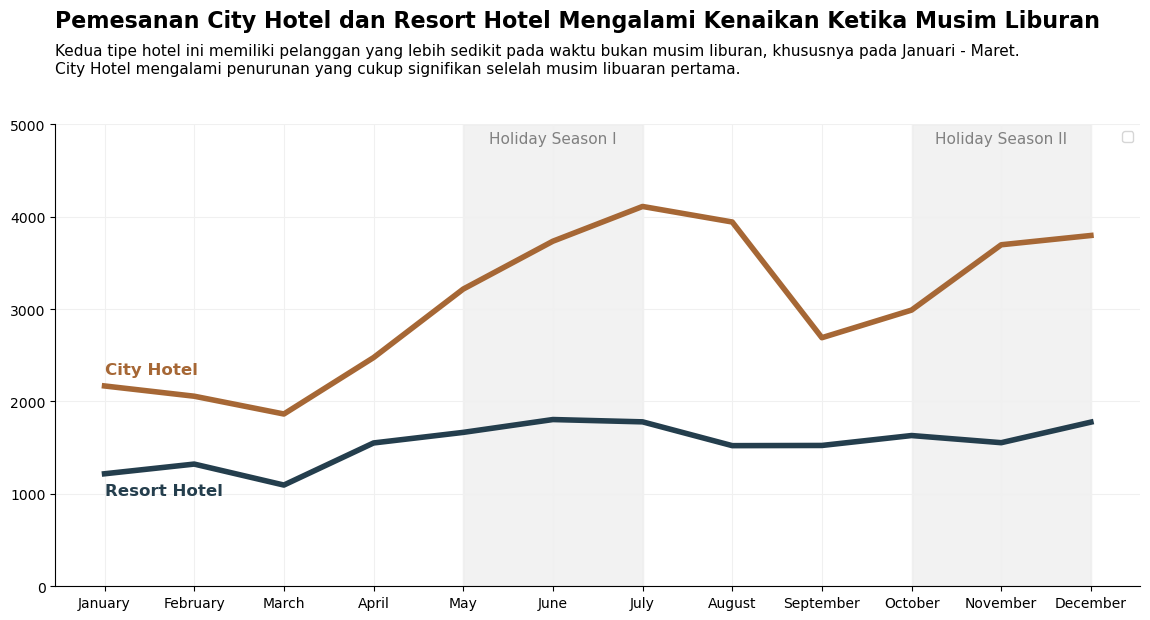

In [28]:
# Visualization

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# membuat plot
sns.lineplot(x='arrival_date_month', y='avg_month', hue='hotel', data= df_monthly_sort, palette=['#A66735', '#243E4D'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0,5000)

# -----------------------------------------------------------------------------------------------------------------------------
# mengatur label
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

# -----------------------------------------------------------------------------------------------------------------------------
# legend
plt.legend([])
plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#A66735', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#243E4D', ha='left', fontweight='bold')

# -----------------------------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Pemesanan City Hotel dan Resort Hotel Mengalami Kenaikan Ketika Musim Liburan', fontsize=16, pad=70, loc='left',fontweight='bold')
plt.text(y = 5700, x = -0.55, s = 'Kedua tipe hotel ini memiliki pelanggan yang lebih sedikit pada waktu bukan musim liburan, khususnya pada Januari - Maret. \nCity Hotel mengalami penurunan yang cukup signifikan selelah musim libuaran pertama.', 
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------------------------
#set holiday season I
plt.stackplot([4, 5, 6], [5000], color='grey', alpha=0.1)
plt.text(x=5, y=4800, s='Holiday Season I', fontsize=11, color='grey', ha='center')

#set holiday season
plt.stackplot([9, 10, 11], [5000], color='grey', alpha=0.1)
plt.text(x=10, y=4800, s='Holiday Season II', fontsize=11, color='grey', ha='center')

Key Takeways :
1. Pemesanan hotel cenderung meningkat selama musim liburan.
2. Kedua jenis hotel menunjukkan tingkat pemesanan **tertinggi** pada bulan **Mei hingga Agustus**, terutama untuk City Hotel, yang mengalami peningkatan yang signifikan selama periode tersebut. Hal ini mungkin disebabkan oleh fakta bahwa pada tahun 2017-2019, bulan Mei hingga Agustus bertepatan dengan **libur sekolah** dan berbagai hari **libur nasional**, seperti cuti bersama dan peristiwa keagamaan seperti *Ramadan dan Idul Fitri**. Oleh karena itu, banyak orang memanfaatkan kesempatan tersebut untuk berlibur, melakukan perjalanan ke luar kota, dan melakukan pemesanan hotel. Sebaliknya, periode dari Oktober hingga Desember bersamaan dengan perayaan Natal dan Tahun Baru.
3. Tingkat pemesanan **terendah** terjadi selama periode **Januari hingga Maret**. Hal ini dapat dijelaskan oleh **minimnya hari libur nasional**, **awal tahun ajaran baru** bagi pelajar, dan **penurunan aktivitas perjalanan bisnis** karena masih awal tahun.

###  Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

Analisis ini berfokus untuk melihat trend antara durasi menginap dengan tingkat pembatalan pemesanan hotel.

#### Stay Duration
---

lama durasi waktu menginap yang dipesan oleh pelanggan dapat dilihat dalam fitur `stays_in_weekdays_nights` dan `stays_in_weekend_nights`

In [32]:
# Membuat kolom untuk melihat total durasi menginap
df_analyze['total_stay_duration'] = df_analyze['stays_in_weekend_nights'] + df_analyze['stays_in_weekdays_nights']
df_analyze.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,total_stay_duration
84488,City Hotel,1,3,2018,April,9,26,0,0,1,0,0,With Meal,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,0.00,0,1,No-Show,1.0,0
16074,Resort Hotel,0,65,2017,October,32,8,2,4,2,0,0,With Meal,Kota Batu,Direct,Direct,0,0,0,0,No Deposit,250,0,0,Personal,209.00,0,1,Check-Out,2.0,6
69006,City Hotel,1,294,2019,July,21,24,0,4,2,0,0,No Meal,Kabupaten Belitung,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,110.25,0,0,Canceled,2.0,4


Persebaran fitur `total_stay_duration` akan dilihat menggunakan histplot

<Axes: xlabel='total_stay_duration', ylabel='Count'>

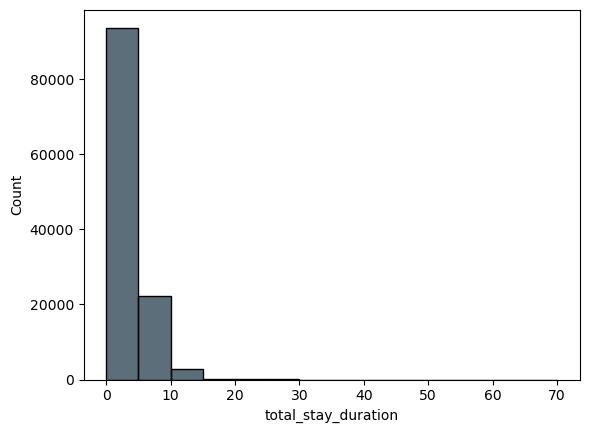

In [34]:
sns.histplot(data = df_analyze, x = df_analyze['total_stay_duration'], binwidth = 5, color='#243E4D')

In [41]:
print('rentang durasi stay pelanggan mulai dari 1 sampai {} hari'.format(df_analyze['total_stay_duration'].max()))

rentang durasi stay pelanggan mulai dari 1 sampai 69 hari


Key Takeways :
- Rentang durasi stay pelanggan berada pada 1-69 har
- Durasi stay pelanggan berpusat pada durasi 0-5 hari

Untuk mempermudah interpretasi total durasi pelanggan akan dikategorisasi berdasarkan minggu :
- **< 1** : 0 - 7 hari
- **1 - 2** : 8 - 14 hari
- **2 - 3** : 15 - 21 hari
- **2 - 4** : 22 - 28 hari
- **> 4** : > 28 hari

In [43]:
df_analyze['total_stay_week'] = np.where((df_analyze['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_analyze['total_stay_duration']) < 15, '1-2',
                                   np.where((df_analyze['total_stay_duration']) < 22, '2-3', 
                                   np.where((df_analyze['total_stay_duration']) < 29, '3-4', '> 4'))))

In [44]:
df_analyze['total_stay_week'].value_counts()

< 1    113979
1-2      4795
2-3       274
3-4       108
> 4        47
Name: total_stay_week, dtype: int64

#### Ratio Cancel Rate Based on Hotel Type
---

In [45]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out,2.0


In [57]:
# Ratio cancel and not cancel City Hotel

df_city = df_analyze[df_analyze['hotel']=='City Hotel']

# group fitur iscanceled dan agregasi menggunakan count
cancel = df_city.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel

,is_canceled,total
0,Not Canceled,46082
1,Canceled,33078


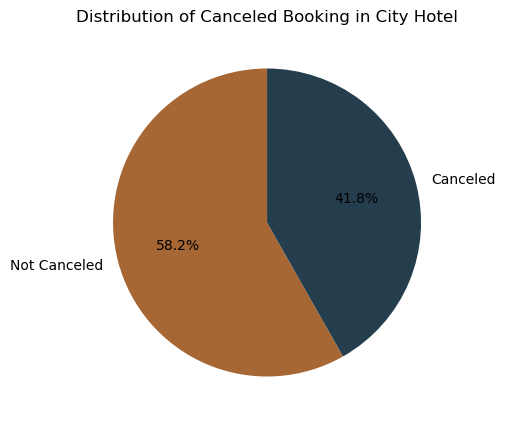

In [58]:
labels = ['Not Canceled', 'Canceled']
sizes = [46082, 33078]

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#A66735', '#243E4D'])
plt.title('Distribution of Canceled Booking in City Hotel')

# Display the pie chart
plt.show()

In [71]:
# Ratio Canceled Order di Resort Hotel
df_just_resort = df_analyze[df_analyze['hotel'] == 'Resort Hotel']
df_resort = df_just_resort.groupby('is_canceled')[['is_canceled']].count()
df_resort.columns = ['total']
df_resort.reset_index(inplace=True)
ket = {0 : 'Not Canceled',
       1 : 'Canceled'}
df_resort['is_canceled'] = df_resort['is_canceled'].map(ket)
df_resort

,is_canceled,total
0,Not Canceled,28924
1,Canceled,11119


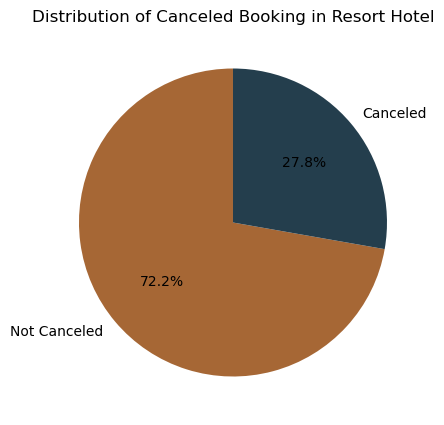

In [86]:
labels = ['Not Canceled', 'Canceled']
sizes = [28924, 11119]

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#A66735', '#243E4D'])
plt.title('Distribution of Canceled Booking in Resort Hotel')

# Display the pie chart
plt.show()

City Hotel memiliki presentase cancellation rate yang lebih tinggi dibandingkan dengan Resort Hotel. Hal ini menunjukkan bahwa banyak pelanggan yang memesan City Hotel cenderung lebih sering membatalkan pesanannya. City Hotel memiliki lokasi yang lebih terpusat di kota atau daerah perkotaan dan dekat dengan tempat-tempat wisata dan bisnis, dapat diduga banyaknya kegiatan yang harus diatur dan mungkin juga pengaruh faktor lain, banyak pelanggan yang membatalkan pesanan mereka.<br>
<br>

#### Cancelation Rate by Stay Duration
---

In [92]:
# group cancel rate based on totel type,duration
cancel_rate = df_analyze.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted by week
week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32403,77939,42.0
8,Resort Hotel,< 1,9917,36040,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1077,3726,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


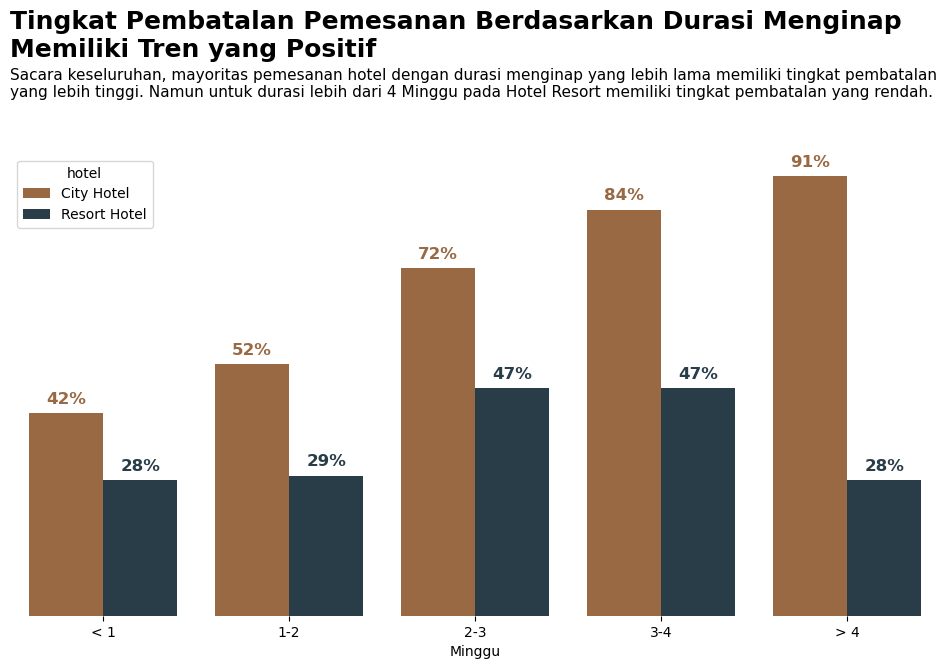

In [94]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

# -----------------------------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = cancel_rate['total_stay_week'], y = cancel_rate['cancel_rate'], hue=cancel_rate['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#A66735', '#243E4D'])

# -----------------------------------------------------------------------------------------------------------------------------
# mengatur label
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('')
plt.xlabel('Minggu')

# -----------------------------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Berdasarkan Durasi Menginap \nMemiliki Tren yang Positif', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 110, x = -0.5, s = 'Sacara keseluruhan, mayoritas pemesanan hotel dengan durasi menginap yang lebih lama memiliki tingkat pembatalan \nyang lebih tinggi. Namun untuk durasi lebih dari 4 Minggu pada Hotel Resort memiliki tingkat pembatalan yang rendah.',
         ha='left', va='center', size=11)


# -----------------------------------------------------------------------------------------------------------------------------
patches
for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot+'%', (a.get_x()+a.get_width()/2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)

Key Takeaways:
- **Tingkat pembatalan akan semakin tinggi seiring dengan lama durasi menginap yang dipesan pada kedua tipe hotel**.
- Pada City Hotel untuk durasi menginap lebih dari 2 minggi memiliki Cancelation Rate lebih dari 50%, apalagi untuk durasi menginap lebih dari sebulan hanya 1 dari 10 orang yang tidak membatalkan pesanannya. Cancelation Rate tersebut cukup tinggi sehingga perusahaan harus dapat mennentukan strategi yang tepat untuk dapat memperkecil tingkat pembatalan yang terjadi.

### **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

Analisis ini berfokus untuk melihat trend Lead time atau masa tunggu (jarak waktu pemesanan hotel hingga waktu kedatangan) dan tingkat pembatalan pemesanan hotel. 

#### Duration Of lead Time
---

Untuk melihat rentang waktu masa tunggu pada dataset, maka dapat dilihat dari distribusi histogramnya

<Axes: xlabel='lead_time', ylabel='Count'>

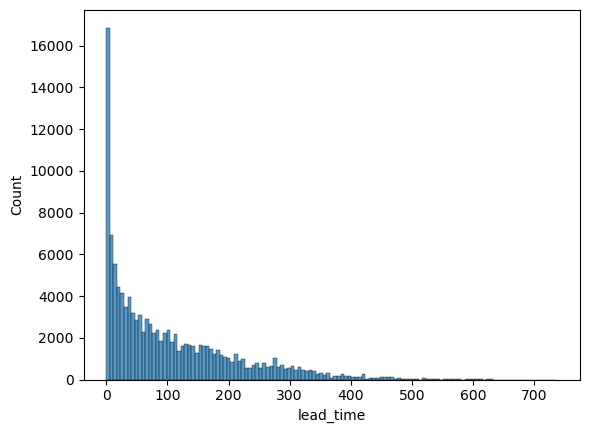

In [96]:
# distribusi lead time
sns.histplot(df_analyze['lead_time'])

In [97]:
unik = df_analyze['lead_time'].nunique()
mx = df_analyze['lead_time'].max()
mn = df_analyze['lead_time'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 479
Max durasi: 737
Min durasi: 0


Lead time memiliki rentang 0 hingga 737 hari, untuk memudahkan interpretasi maka akan dibuat pengkategorian perbualan.

In [99]:
df_analyze['lead_category'] = np.where((df_analyze['lead_time']) < 31, '1',
                        np.where((df_analyze['lead_time']) <= 61, '2',
                        np.where((df_analyze['lead_time']) <= 91, '3', 
                        np.where((df_analyze['lead_time']) <= 121, '4',
                        np.where((df_analyze['lead_time']) <= 151, '5',
                        np.where((df_analyze['lead_time']) <= 181, '6',
                        np.where((df_analyze['lead_time']) <= 211, '7', 
                        np.where((df_analyze['lead_time']) <= 241, '8',
                        np.where((df_analyze['lead_time']) <= 271, '9',
                        np.where((df_analyze['lead_time']) <= 301, '10', 
                        np.where((df_analyze['lead_time']) <= 331, '11',
                        np.where((df_analyze['lead_time']) <= 361, '12', '>1 tahun'))))))))))))

In [101]:
df_analyze['lead_category'].value_counts()

1           38578
2           17462
3           12398
4           10359
5            8237
6            7784
7            5609
8            4180
10           3524
>1 tahun     3405
9            3377
11           2581
12           1709
Name: lead_category, dtype: int64

#### Cancelation Rate by Lead Time
---

In [103]:
# summmary
lead_cancel = df_analyze.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)

# --------------------------------------------------------------------------------------------------------------------------------------
# sorted
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23243,22.0
13,Resort Hotel,1,1984,15335,13.0
4,City Hotel,2,4802,12253,39.0
17,Resort Hotel,2,1593,5209,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2537,41.0
7,City Hotel,5,2574,5700,45.0


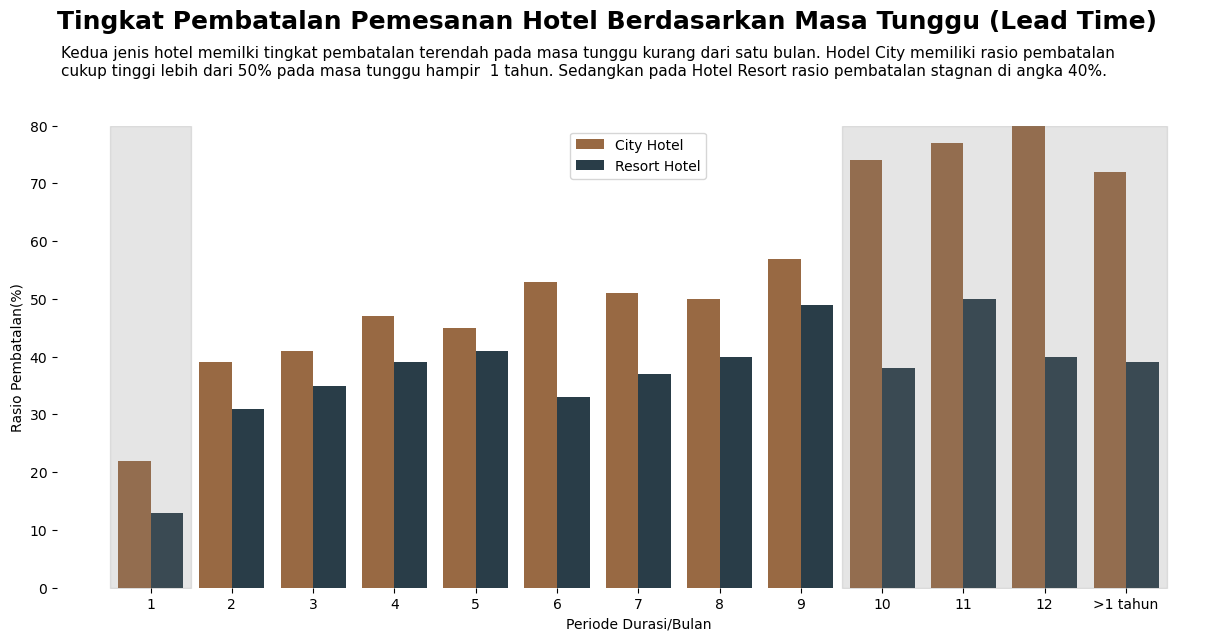

In [104]:
# membuat visualisasi data
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15,6)

# -----------------------------------------------------------------------------------------------------------
# set border
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# -----------------------------------------------------------------------------------------------------------
# plot
ax = sns.barplot(x = lead_cancel['lead_category'], y = lead_cancel['lead_cr'], hue=lead_cancel['hotel'], 
                 hue_order = ['City Hotel', 'Resort Hotel'], palette=['#A66735', '#243E4D'])
plt.ylim(0,80)

# -----------------------------------------------------------------------------------------------------------
# mengatur label
plt.ylabel('Rasio Pembatalan(%)')
plt.xlabel('Periode Durasi/Bulan')
plt.legend(loc='upper center')

# -----------------------------------------------------------------------------------------------------------
# menambahkan judul dan deskripsi
plt.title('Tingkat Pembatalan Pemesanan Hotel Berdasarkan Masa Tunggu (Lead Time)', fontsize=18, pad=70, loc='left',fontweight='bold')
plt.text(y = 91, x = -1.1, s = 'Kedua jenis hotel memilki tingkat pembatalan terendah pada masa tunggu kurang dari satu bulan. Hodel City memiliki rasio pembatalan \ncukup tinggi lebih dari 50% pada masa tunggu hampir  1 tahun. Sedangkan pada Hotel Resort rasio pembatalan stagnan di angka 40%.',
         ha='left', va='center', size=11)

# -----------------------------------------------------------------------------------------------------------
# set cr 
plt.stackplot([-0.5, 0.5], [80], color='grey', alpha=0.2)
plt.stackplot([8.5, 12.5], [80], color='grey', alpha=0.2)

Key Takeaways:
- Tingkat pembatalan berdasarkan masa tunggu masih **didominasi oleh City Hotel**, dengan tingkat Cancelation Rate cenderung tinggi ketika masa tunggu hampir satu tahun.
- Dengan melihat Cancelation Rate yang rendah pada masa tunggu sekitar dibawah satu bulan, maka **perusahaan dapat membuat terms pemesanan hotel dengan batasan pemesanan maksimum** guna menghindari peluang pelanggan membatalkan pesanan karena kemungkinan berubah pikiran atau menemukan hotel lain yang lebih diminati. <br>
<br>

## **Conclusion**

#### Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?

Secara keseluruhan City Hotel 66.41% lebih banyak dipesan oleh pelanggan, dengan peningkatan jumlah pelanggan sececara signifikan terjadi pada musim liburan Mei-Juli dan Oktober - Desember. Resort hotel cenderung stagnan dengan peningkatan yang relatif kecil pada musim liburan dibandingkan dengan City Hotel.<br>
<br>

#### Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?
Tingkat pembatalan akan semakin tinggi seiring dengan lama durasi menginap yang dipesan pada kedua tipe hotel, apalagi City Hotel memiliki tingakat pembetalan lebih dari 70 - 90% pada durasi menginap lebih dari 3 minggu. <br>
<br>

#### Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?
Tingkat pembatalan akan semakin tinggi seiring dengan masa tunggu pada kedua tipe hotel. Pembatalan terendah ketika masa tunggu dibawah satu bulan.
<br>
<br>